In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from numba import jit
from tied_utils import simulated_tied_ddm_norm, tied_data_gen_wrapper, rho_E_minus_small_t_NORM_TIED_fn
from scipy.integrate import quad

ImportError: cannot import name 'all_RTs_fit_OPTIM_fn' from 'tied_utils' (/home/rka/code/ddm_codes/action_init_ddm/tied_utils.py)

# Params

In [14]:
# Stim params
# ILD_arr = [-6, -3, 0, 3, 6]
# ABL_arr = [20, 40, 60]
ILD_arr = [3]
ABL_arr = [40]

# Model params
rate_lambda = 0.076
theta_E = 50.7
T_0 = 0.19*(1e-3)
t_non_decision = 78e-3

# sim params
N_sim = int(1e6)
dt = 1e-4

# fitting params
K_max = 10

# Gen data

In [15]:
sim_results = Parallel(n_jobs=-1)(delayed(tied_data_gen_wrapper)(ILD_arr, ABL_arr, rate_lambda, theta_E, T_0, t_non_decision, dt) for _ in range(N_sim))
choice_arr = np.array([x['choice'] for x in sim_results])
RT_arr = np.array([x['rt'] for x in sim_results])

ABL_arr = np.array([x['ABL'] for x in sim_results])
ILD_arr = np.array([x['ILD'] for x in sim_results])

ABLs_unique = np.unique(ABL_arr)

choices_by_ABL = {}; RTs_by_ABL = {}
for ABL in ABLs_unique:
    choices_by_ABL[ABL] = choice_arr[ABL_arr == ABL]
    RTs_by_ABL[ABL] = RT_arr[ABL_arr == ABL]

# Fit correct and wrong RT in each ABL

# theory curves normalized

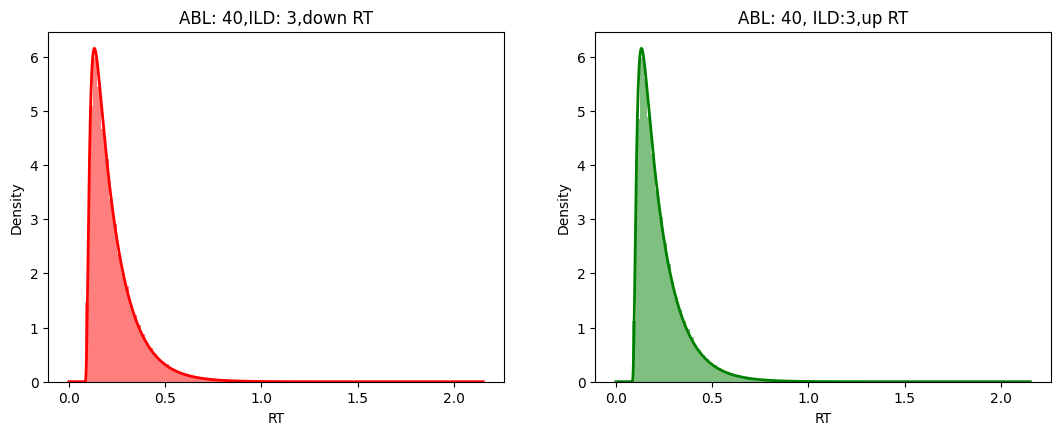

In [17]:
t_pts = np.linspace(0.0001, max(RT_arr), 10000)
ILD = ILD_arr[0]
plt.figure(figsize=(20,10))
fig_num = 1
for i in range(len(ABLs_unique)):
    ABL_i = ABLs_unique[i]
    choices_ABL_i = choices_by_ABL[ABL_i]
    RTs_ABL_i = RTs_by_ABL[ABL_i]

    choices_down_ABL_i_idx = np.where(choices_ABL_i == -1)[0]
    RTs_down_ABL_i = RTs_ABL_i[choices_down_ABL_i_idx]

    choices_up_ABL_i_idx = np.where(choices_ABL_i == 1)[0]
    RTs_up_ABL_i = RTs_ABL_i[choices_up_ABL_i_idx]
    PDF_RT_ABL_i_down = [rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, theta_E, T_0, t_non_decision, K_max) for t in t_pts]
    integral_norm_term = np.array(quad(rho_E_minus_small_t_NORM_TIED_fn, 0, np.inf, args=(ILD, ABL_i, rate_lambda, theta_E, T_0, t_non_decision, K_max))[0])

    PDF_RT_ABL_i_down_norm = PDF_RT_ABL_i_down/integral_norm_term

    PDF_RT_ABL_i_up = [rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, -theta_E, T_0, t_non_decision, K_max) for t in t_pts]
    integral_norm_term = np.array(quad(rho_E_minus_small_t_NORM_TIED_fn, 0, np.inf, args=(ILD, ABL_i, rate_lambda, -theta_E, T_0, t_non_decision, K_max))[0])
    PDF_RT_ABL_i_up_norm = PDF_RT_ABL_i_up/integral_norm_term

    plt.subplot(2,3,fig_num)
    plt.hist(RTs_down_ABL_i, bins=100, color='r', alpha=0.5, density=True);
    plt.plot(t_pts, PDF_RT_ABL_i_down_norm, color='r', linewidth=2);
    plt.title(f'ABL: {ABL_i},ILD: {ILD},down RT'); plt.xlabel('RT'); plt.ylabel('Density');
    fig_num += 1

    plt.subplot(2,3,fig_num)
    plt.hist(RTs_up_ABL_i, bins=100, color='g', alpha=0.5, density=True);
    plt.plot(t_pts, PDF_RT_ABL_i_up_norm, color='g', linewidth=2);
    plt.title(f'ABL: {ABL_i}, ILD:{ILD},up RT'); plt.xlabel('RT'); plt.ylabel('Density');
    fig_num += 1


# diff btn theory and hist

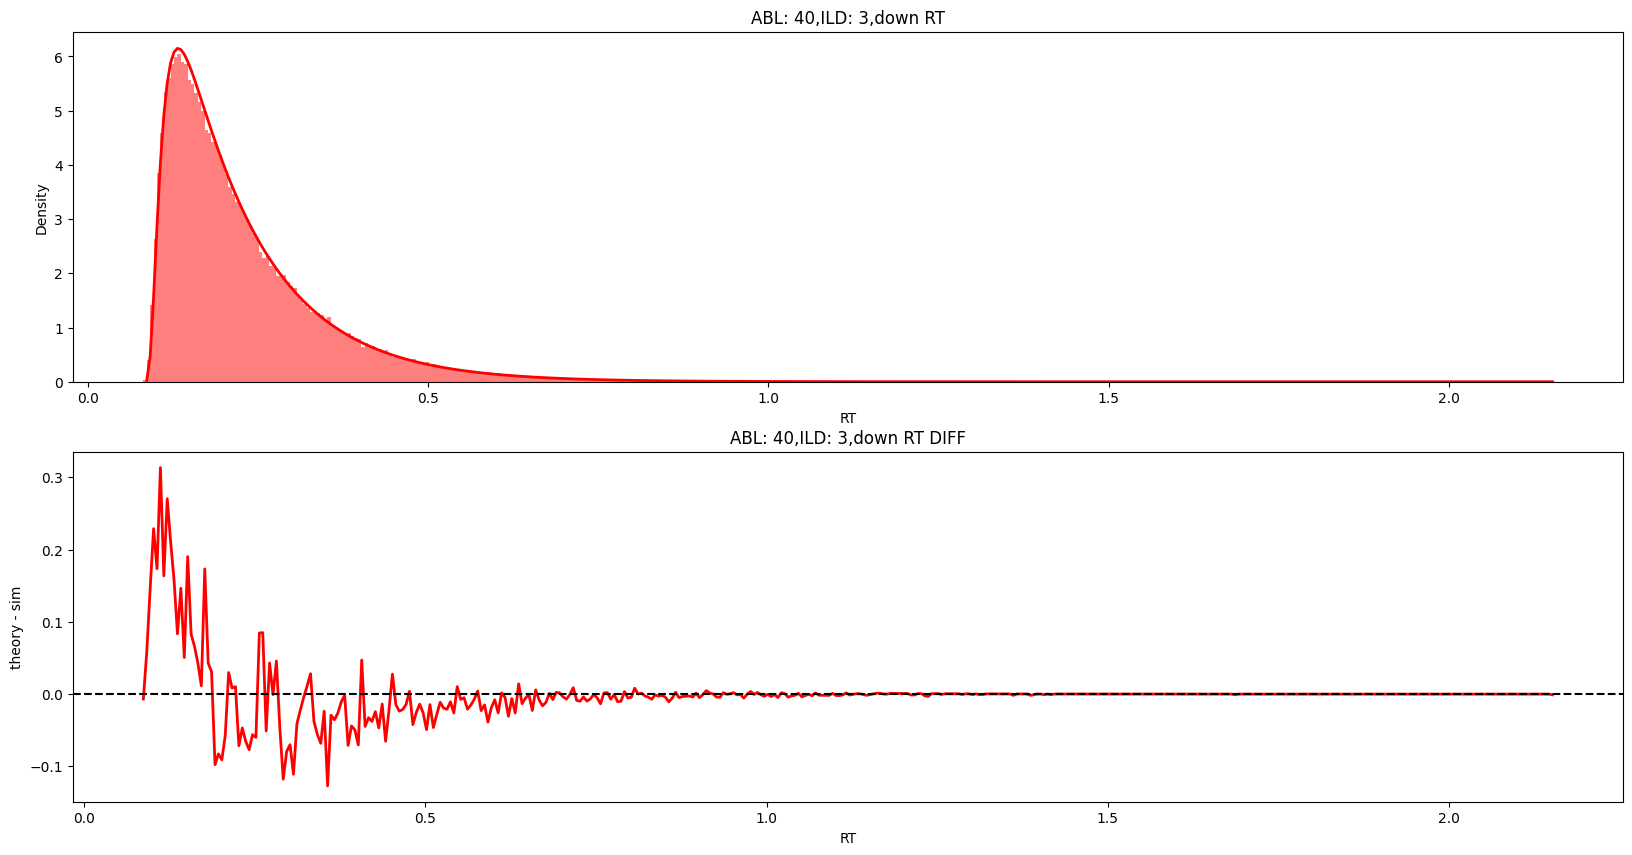

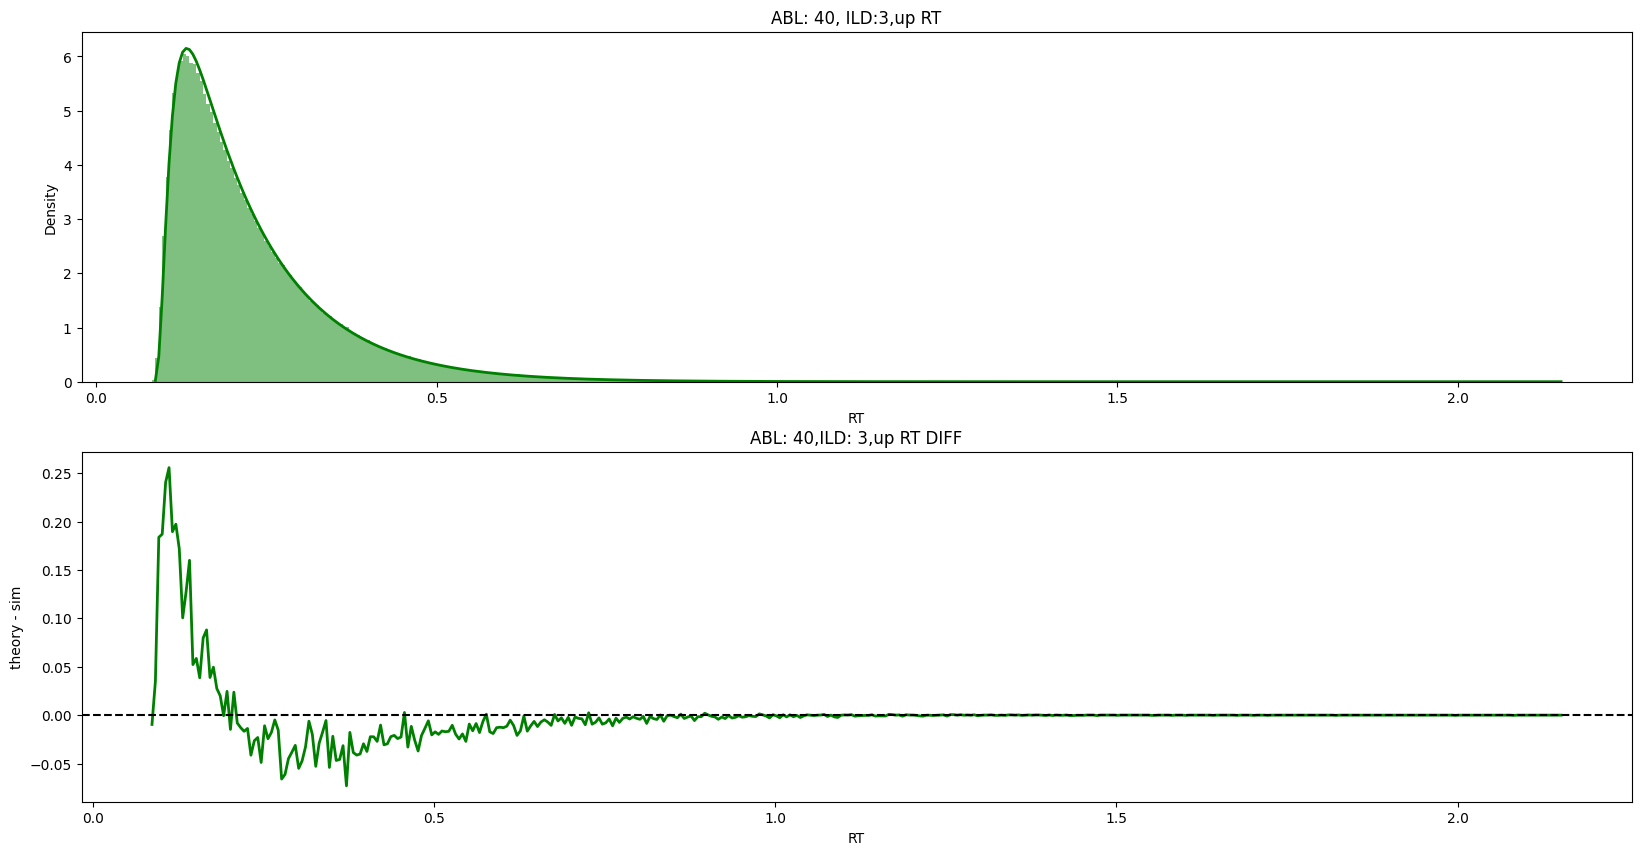

In [20]:
bin_width = 5e-3
bins = np.arange(min(RT_arr), max(RT_arr) + bin_width, bin_width)
t_pts = bins[:-1] + bin_width/2

ILD = ILD_arr[0]
for i in range(len(ABLs_unique)):
    ABL_i = ABLs_unique[i]
    choices_ABL_i = choices_by_ABL[ABL_i]
    RTs_ABL_i = RTs_by_ABL[ABL_i]

    choices_down_ABL_i_idx = np.where(choices_ABL_i == -1)[0]
    RTs_down_ABL_i = RTs_ABL_i[choices_down_ABL_i_idx]

    choices_up_ABL_i_idx = np.where(choices_ABL_i == 1)[0]
    RTs_up_ABL_i = RTs_ABL_i[choices_up_ABL_i_idx]
    PDF_RT_ABL_i_down = [rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, theta_E, T_0, t_non_decision, K_max) for t in t_pts]
    integral_norm_term = np.array(quad(rho_E_minus_small_t_NORM_TIED_fn, 0, np.inf, args=(ILD, ABL_i, rate_lambda, theta_E, T_0, t_non_decision, K_max))[0])

    PDF_RT_ABL_i_down_norm = PDF_RT_ABL_i_down/integral_norm_term

    PDF_RT_ABL_i_up = [rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, -theta_E, T_0, t_non_decision, K_max) for t in t_pts]
    integral_norm_term = np.array(quad(rho_E_minus_small_t_NORM_TIED_fn, 0, np.inf, args=(ILD, ABL_i, rate_lambda, -theta_E, T_0, t_non_decision, K_max))[0])
    PDF_RT_ABL_i_up_norm = PDF_RT_ABL_i_up/integral_norm_term

    plt.figure(figsize=(20,10))
    # theory and sim
    plt.subplot(2,1,1)

    down_hist, down_bins = np.histogram(RTs_down_ABL_i, bins=bins, density=True)
    plt.bar(down_bins[:-1], down_hist, width=bin_width, color='r', alpha=0.5);

    plt.plot(t_pts, PDF_RT_ABL_i_down_norm, color='r', linewidth=2);
    plt.title(f'ABL: {ABL_i},ILD: {ILD},down RT'); plt.xlabel('RT'); plt.ylabel('Density');

    # theory - sim
    plt.subplot(2,1,2)

    diff_down = PDF_RT_ABL_i_down_norm - down_hist
    plt.plot(t_pts, diff_down, color='r', linewidth=2);
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('RT'); plt.ylabel('theory - sim');plt.title(f'ABL: {ABL_i},ILD: {ILD},down RT DIFF');

    plt.figure(figsize=(20,10))
    # thoery and sim
    plt.subplot(2,1,1)

    up_hist, up_bins = np.histogram(RTs_up_ABL_i, bins=bins, density=True)
    plt.bar(up_bins[:-1], up_hist, width=bin_width, color='g', alpha=0.5);

    plt.plot(t_pts, PDF_RT_ABL_i_up_norm, color='g', linewidth=2);
    plt.title(f'ABL: {ABL_i}, ILD:{ILD},up RT'); plt.xlabel('RT'); plt.ylabel('Density');

    # theory - sim
    plt.subplot(2,1,2)
    diff_up = PDF_RT_ABL_i_up_norm - up_hist

    plt.plot(t_pts, diff_up, color='g', linewidth=2);
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('RT'); plt.ylabel('theory - sim');plt.title(f'ABL: {ABL_i},ILD: {ILD},up RT DIFF');


# theory curves non-norm

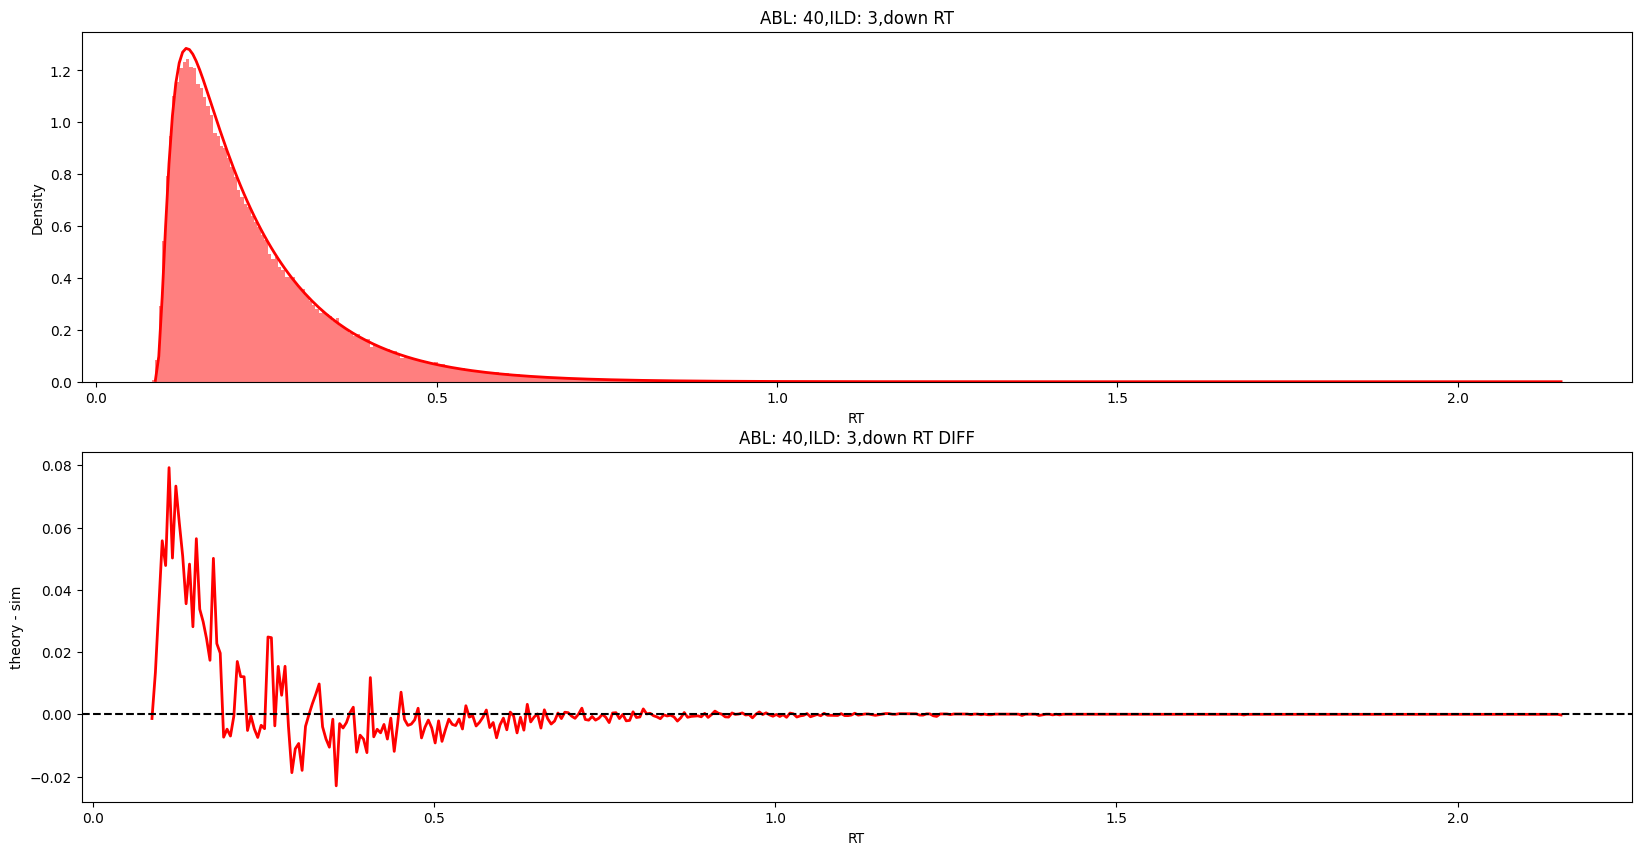

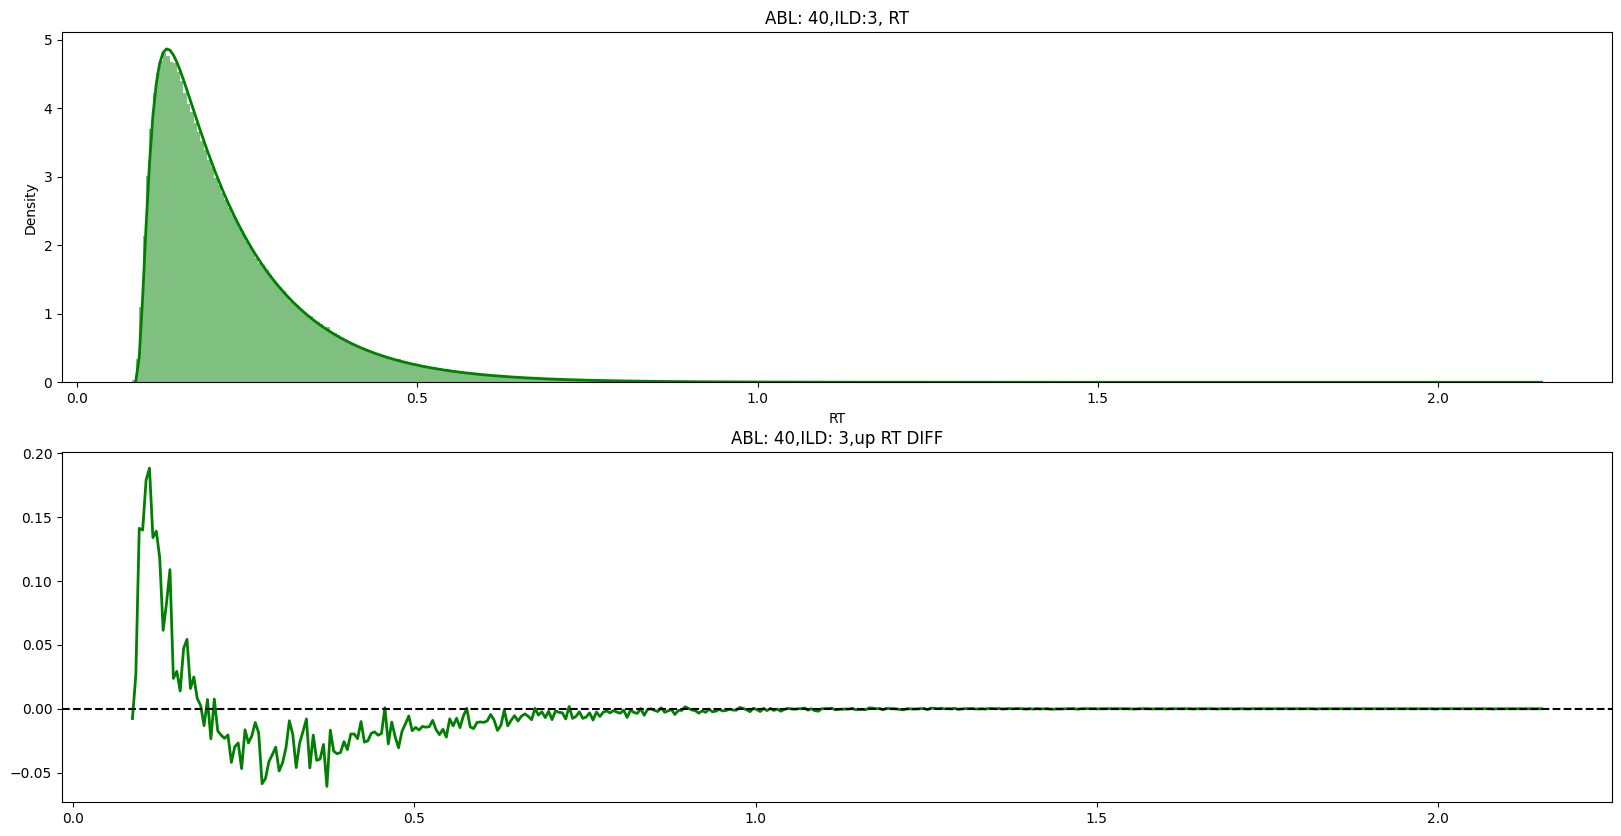

In [21]:
bin_width = 5e-3
bins = np.arange(min(RT_arr), max(RT_arr) + bin_width, bin_width)
t_pts = bins[:-1] + bin_width/2

ILD = ILD_arr[0]
for i in range(len(ABLs_unique)):
    ABL_i = ABLs_unique[i]
    choices_ABL_i = choices_by_ABL[ABL_i]
    RTs_ABL_i = RTs_by_ABL[ABL_i]

    choices_down_ABL_i_idx = np.where(choices_ABL_i == -1)[0]
    RTs_down_ABL_i = RTs_ABL_i[choices_down_ABL_i_idx]

    choices_up_ABL_i_idx = np.where(choices_ABL_i == 1)[0]
    RTs_up_ABL_i = RTs_ABL_i[choices_up_ABL_i_idx]

    PDF_RT_ABL_i_down = np.array([rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, theta_E, T_0, t_non_decision, K_max) for t in t_pts])
    PDF_RT_ABL_i_up = np.array([rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, -theta_E, T_0, t_non_decision, K_max) for t in t_pts])

    # DOWN
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    #  theory and sim
    down_hist, down_bins = np.histogram(RTs_down_ABL_i, bins=bins, density=True)
    down_hist *= len(choices_down_ABL_i_idx)/len(choices_ABL_i)
    plt.bar(down_bins[:-1], down_hist, width=bin_width, color='r', alpha=0.5);
    plt.plot(t_pts, PDF_RT_ABL_i_down, color='r', linewidth=2);
    plt.title(f'ABL: {ABL_i},ILD: {ILD},down RT'); plt.xlabel('RT'); plt.ylabel('Density');

    plt.subplot(2,1,2)
    # theory - sim
    diff_down = PDF_RT_ABL_i_down - down_hist
    plt.plot(t_pts, diff_down, color='r', linewidth=2);
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('RT'); plt.ylabel('theory - sim');plt.title(f'ABL: {ABL_i},ILD: {ILD},down RT DIFF');

    # UP
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    # theory and sim
    up_hist, up_bins = np.histogram(RTs_up_ABL_i, bins=bins, density=True)
    up_hist *= len(choices_up_ABL_i_idx)/len(choices_ABL_i)
    plt.bar(up_bins[:-1], up_hist, width=bin_width, color='g', alpha=0.5);
    plt.plot(t_pts, PDF_RT_ABL_i_up, color='g', linewidth=2);
    plt.title(f'ABL: {ABL_i},ILD:{ILD}, RT'); plt.xlabel('RT'); plt.ylabel('Density');

    plt.subplot(2,1,2)
    # theory - sim
    diff_up = PDF_RT_ABL_i_up - up_hist
    plt.plot(t_pts, diff_up, color='g', linewidth=2);
    plt.axhline(0, color='k', linestyle='--')
    plt.title(f'ABL: {ABL_i},ILD: {ILD},up RT DIFF');



# up and down - sim and theory together

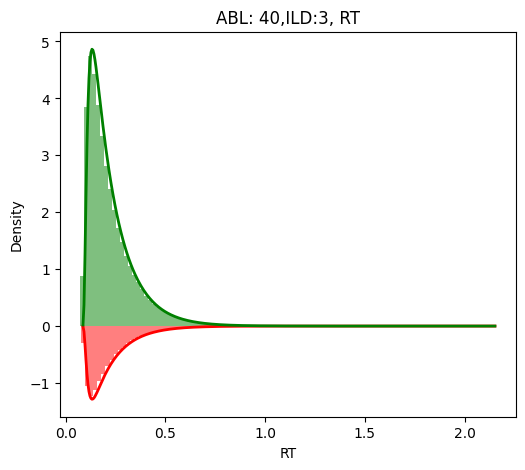

In [24]:
plt.figure(figsize=(20,5))
for i in range(len(ABLs_unique)):
    ABL_i = ABLs_unique[i]
    choices_ABL_i = choices_by_ABL[ABL_i]
    RTs_ABL_i = RTs_by_ABL[ABL_i]

    choices_down_ABL_i_idx = np.where(choices_ABL_i == -1)[0]
    RTs_down_ABL_i = RTs_ABL_i[choices_down_ABL_i_idx]

    choices_up_ABL_i_idx = np.where(choices_ABL_i == 1)[0]
    RTs_up_ABL_i = RTs_ABL_i[choices_up_ABL_i_idx]

    PDF_RT_ABL_i_down = np.array([rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, theta_E, T_0, t_non_decision, K_max) for t in t_pts])
    PDF_RT_ABL_i_up = np.array([rho_E_minus_small_t_NORM_TIED_fn(t, ILD, ABL_i, rate_lambda, -theta_E, T_0, t_non_decision, K_max) for t in t_pts])

    plt.subplot(1,3,fig_num)
    hist_down, bins_down = np.histogram(RTs_down_ABL_i, bins=100, density=True)
    hist_down *= len(choices_down_ABL_i_idx)/len(choices_ABL_i)

    plt.bar(bins_down[:-1], -hist_down, width=bins_down[1]-bins_down[0], color='r', alpha=0.5);
    plt.plot(t_pts, -PDF_RT_ABL_i_down, color='r', linewidth=2);

    hist_up, bins_up = np.histogram(RTs_up_ABL_i, bins=100, density=True)
    hist_up *= len(choices_up_ABL_i_idx)/len(choices_ABL_i)

    plt.bar(bins_up[:-1], hist_up, width=bins_up[1]-bins_up[0], color='g', alpha=0.5);
    plt.plot(t_pts, PDF_RT_ABL_i_up, color='g', linewidth=2);
    plt.title(f'ABL: {ABL_i},ILD:{ILD}, RT'); plt.xlabel('RT'); plt.ylabel('Density');



# Verifying that TIED simulation - Norm and Non-norm are same

## Norm units sim

In [66]:
@jit
def simulated_tied_ddm_norm(ILD, ABL, rate_lambda, theta_E, T_0, t_non_decision, dt):
    DV = 0; tau = 0; 

    chi = 17.37
    t_theta = T_0 * (theta_E**2) * (10**(-rate_lambda*ABL/20)) * (1/(2*np.cosh(rate_lambda*ILD/chi)))
    d_tau = dt/t_theta
    dB_tau = d_tau**0.5

    drift = theta_E * np.tanh(rate_lambda * ILD / chi)
    
    # print(f"Drift = {drift}, t_theta = {t_theta}, d_tau = {d_tau}, dB_tau = {dB_tau}")
    while True:
        DV += drift*d_tau + np.random.normal(0, dB_tau)
        tau += 1

        # bounds are +1 and -1 as simulation is done in normalized units
        if DV >= 1:
            return 1, (tau*d_tau)*t_theta + t_non_decision
        elif DV <= -1:
            return -1, (tau*d_tau)*t_theta + t_non_decision

In [67]:
results = Parallel(n_jobs=-1)(delayed(simulated_tied_ddm_norm)(ILD, ABL, rate_lambda, theta_E, T_0, t_non_decision, dt) for _ in range(N_sim))

In [68]:
choice_arr = np.array([res[0] for res in results])
RT_arr = np.array([res[1] for res in results])

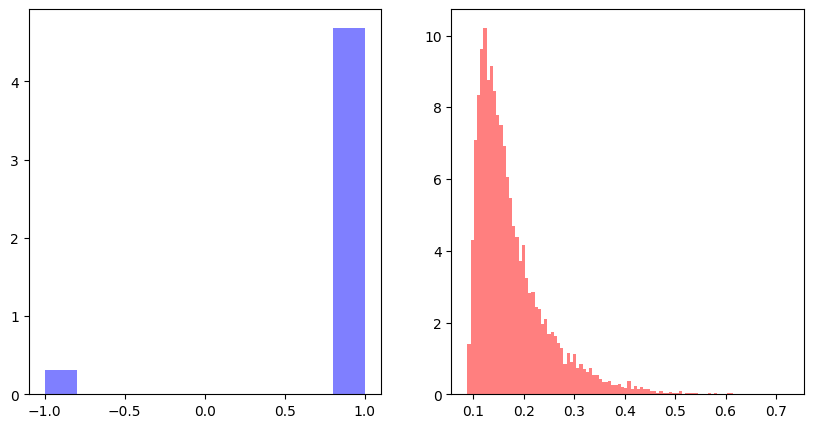

In [69]:
# plot histograms of choice and RT_arr side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(choice_arr, color='blue', alpha=0.5, density=True)

plt.subplot(1, 2, 2)
plt.hist(RT_arr, color='red', alpha=0.5, bins=100, density=True);

## Non-norm units sim

In [70]:
@jit
def simulate_tied_no_norm(ILD, ABL, rate_lambda, theta_E, T_0, t_non_decision, dt):
    DV = 0; t = 0

    chi = 17.37; q_e = 1
    theta = theta_E * q_e
    mu = (2*q_e/T_0) * (10**(rate_lambda * ABL/20)) * np.sinh(rate_lambda * ILD/chi)
    sigma = np.sqrt( (2*(q_e**2)/T_0) * (10**(rate_lambda * ABL/20)) * np.cosh(rate_lambda * ILD/ chi) )
    dB = dt**0.5

    while True:
        DV += mu*dt + sigma*np.random.normal(0, dB)
        t += 1

        if DV >= theta:
            return 1, t*dt + t_non_decision
        elif DV <= -theta:
            return -1, t*dt + t_non_decision


In [71]:
results_2 = Parallel(n_jobs=-1)(delayed(simulate_tied_no_norm)(ILD, ABL, rate_lambda, theta_E, T_0, t_non_decision, dt) for _ in range(N_sim))

In [72]:
choice_arr_2 = np.array([res[0] for res in results_2])
RT_arr_2 = np.array([res[1] for res in results_2])

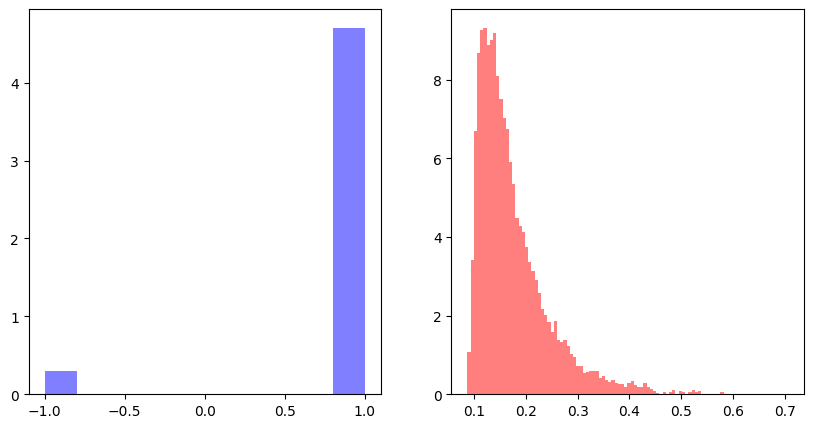

In [73]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(choice_arr_2, color='blue', alpha=0.5, density=True)

plt.subplot(1, 2, 2)
plt.hist(RT_arr_2, color='red', alpha=0.5, bins=100, density=True);

## Both same

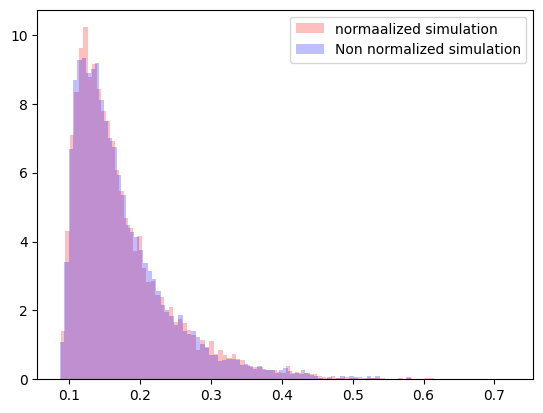

In [74]:
# compare RT_arr and RT_arr_2 histogram
plt.hist(RT_arr, color='red', alpha=0.25, bins=100, density=True, label='normaalized simulation');
plt.hist(RT_arr_2, color='blue', alpha=0.25, bins=100, density=True, label='Non normalized simulation');
plt.legend();

# psychometric curves 

In [6]:
sim_results = Parallel(n_jobs=-1)(delayed(tied_data_gen_wrapper)(ILD_arr, ABL_arr, rate_lambda, theta_E, T_0, t_non_decision, dt) for _ in range(N_sim))

# psychometric curve - fraction right vs ILD

as per weber law, the accuracy depends on the ratio not the absolute value of stim, so at a given ILD, for all 3 ABL, accuracy must be same

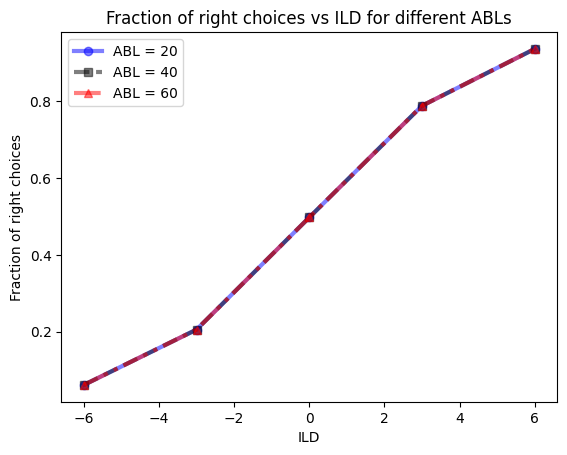

In [30]:
num_right_arr = np.zeros((len(ILD_arr), len(ABL_arr)))
num_left_arr = np.zeros((len(ILD_arr), len(ABL_arr)))
for res in sim_results:
    ILD = res['ILD']
    ABL = res['ABL']
    choice = res['choice']

    ILD_idx = ILD_arr.index(ILD)
    ABL_idx = ABL_arr.index(ABL)

    if choice == 1:
        num_right_arr[ILD_idx, ABL_idx] += 1
    elif choice == -1:
        num_left_arr[ILD_idx, ABL_idx] += 1

frac_right_arr = np.zeros((len(ILD_arr), len(ABL_arr)))
for i in range(len(ILD_arr)):
    for j in range(len(ABL_arr)):
        frac_right_arr[i,j] = num_right_arr[i,j]/(num_right_arr[i,j] + num_left_arr[i,j])
colors = ['b', 'k', 'r']
marker = ['o', 's', '^']
linestyles = ['-', '--', '-.']
for i in range(len(ABL_arr)):
    plt.plot(ILD_arr, frac_right_arr[:,0], label=f'ABL = {ABL_arr[i]}', color=colors[i], marker=marker[i], alpha=0.5, linestyle=linestyles[i], linewidth=3)
plt.legend();
plt.title('Fraction of right choices vs ILD for different ABLs');
plt.xlabel('ILD'); plt.ylabel('Fraction of right choices');

# Chronometric curve - Mean RTD vs ILD

higher ABL will have lower RT

In [14]:
all_RT_per_ILD = {}
for ILD in ILD_arr:
    all_RT_per_ILD[ILD] = {}
    for ABL in ABL_arr:
        all_RT_per_ILD[ILD][ABL] = []

for res in sim_results:
    ILD = res['ILD']
    ABL = res['ABL']
    RT = res['rt']

    all_RT_per_ILD[ILD][ABL].append(RT)

## absolute time - chronometric

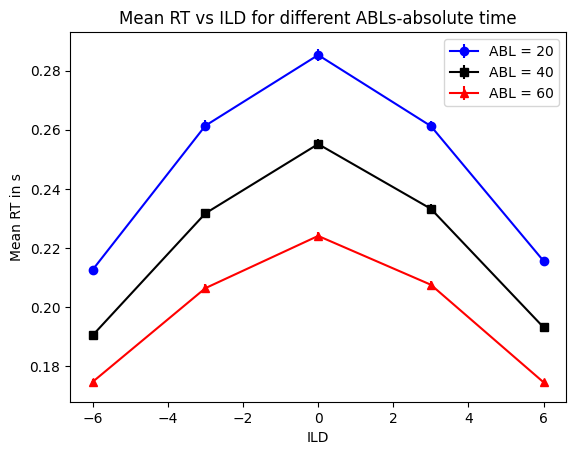

In [21]:
colors = ['b', 'k', 'r']
marker = ['o', 's', '^']
for a in range(len(ABL_arr)):
    mean_rt = np.zeros(len(ILD_arr))
    std_rt = np.zeros(len(ILD_arr))
    for i in range(len(ILD_arr)):
        RT_abl_ild = all_RT_per_ILD[ILD_arr[i]][ABL_arr[a]]
        mean_rt[i] = np.mean(RT_abl_ild)
        std_rt[i] = (np.std(RT_abl_ild)/np.sqrt(len(RT_abl_ild)))

    # plt with scatter and error bars   
    plt.errorbar(ILD_arr, mean_rt, yerr=std_rt, label=f'ABL = {ABL_arr[a]}', color=colors[a], marker=marker[a])
plt.legend();
plt.title('Mean RT vs ILD for different ABLs-absolute time');
plt.xlabel('ILD'); plt.ylabel('Mean RT in s');

## relative time chrono

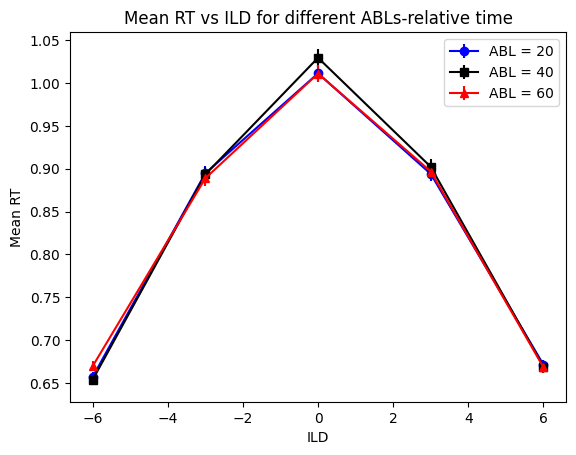

In [23]:
colors = ['b', 'k', 'r']
marker = ['o', 's', '^']
chi = 17.37

for a in range(len(ABL_arr)):
    mean_rt = np.zeros(len(ILD_arr))
    std_rt = np.zeros(len(ILD_arr))
    for i in range(len(ILD_arr)):
        RT_abl_ild = np.array(all_RT_per_ILD[ILD_arr[i]][ABL_arr[a]])
        # normalized time
        RT_abl_ild -= t_non_decision
        t_theta = T_0 * (theta_E**2) * (10**(-rate_lambda*ABL_arr[a]/20)) * (1/(2*np.cosh(rate_lambda*ILD_arr[i]/chi)))
        RT_abl_ild /= t_theta

        mean_rt[i] = np.mean(RT_abl_ild)
        std_rt[i] = (np.std(RT_abl_ild)/np.sqrt(len(RT_abl_ild)))

    # plt with scatter and error bars   
    plt.errorbar(ILD_arr, mean_rt, yerr=std_rt, label=f'ABL = {ABL_arr[a]}', color=colors[a], marker=marker[a])
plt.legend();
plt.title('Mean RT vs ILD for different ABLs-relative time');
plt.xlabel('ILD'); plt.ylabel('Mean RT');

# accuracy doesn't depend on RT

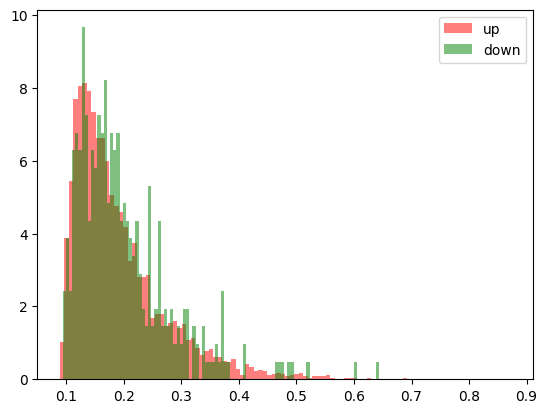

In [33]:
ILD = ILD_arr[-1]
ABL = ABL_arr[-2]
RT_up = []; RT_down = []
for res in sim_results:
    if res['ILD'] == ILD and res['ABL'] == ABL:
        if res['choice'] == 1:
            RT_up.append(res['rt'])
        elif res['choice'] == -1:
            RT_down.append(res['rt'])

# histogram of both RT_up and RT_down in same plot alpha .5
plt.hist(RT_up, bins=100, color='r', alpha=0.5, density=True, label='up');
plt.hist(RT_down, bins=100, color='g', alpha=0.5, density=True, label='down');
plt.legend();
